In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Model

In [3]:
ds = pd.read_csv('/home/pranav/Datasets/MNIST/train.csv')
data = ds.values[:2000, 1:]/255.0
print data.shape

(2000, 784)


In [19]:
#Define the layers
inp = Input(shape=(784, ))

h1 = Dense(100)
a1 = Activation('sigmoid')

h2 = Dense(50)
a2 = Activation('tanh')

h3 = Dense(100)
a3 = Activation('sigmoid')

y = Dense(784, )
ya = Activation('sigmoid')

#Connect the layers of AutoEncoder
out = ya(y(a3(h3(a2(h2(a1(h1(inp))))))))

#Create autoencoder model
model = Model(inputs = [inp], outputs=[out])
model.summary()
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

#Build encoder1
encoder1 = Model(inputs=[inp], outputs=[a1(h1(inp))])
encoder1.summary()

#Build encoder2
INP = Input(shape=(100,))
encoder2 = Model(inputs = [h1], outputs = [a2(h2(INP))])

##
INP = Input(shape=(50,))
dec = Model(inputs=[INP], outputs=[a3(h3(INP))])



#Build Decoder
dec_inp = Input(shape = (100, ))
dec_out = ya(y(a3(h3(dec_inp))))
decoder= Model(inputs=[dec_inp], outputs = [dec_out])
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               5100      
_________________________________________________________________
activation_11 (Activation)   (None, 100)               0         
__________

TypeError: Input tensors to a Model must be Keras tensors. Found: <keras.layers.core.Dense object at 0x7f1611486b50> (missing Keras metadata).

In [6]:
hist = model.fit(data[:1900], data[:1900],
                epochs = 50,
                shuffle = True,
                batch_size = 100,
                validation_data = (data[1900:], data[1900:]))

Train on 1900 samples, validate on 100 samples
Epoch 1/50
1900/1900 [==============================] - 0s - loss: 0.1590 - acc: 0.0079 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 2/50
1900/1900 [==============================] - 0s - loss: 0.0803 - acc: 0.0153 - val_loss: 0.0731 - val_acc: 0.0000e+00
Epoch 3/50
1900/1900 [==============================] - 0s - loss: 0.0701 - acc: 0.0137 - val_loss: 0.0708 - val_acc: 0.0100
Epoch 4/50
1900/1900 [==============================] - 0s - loss: 0.0689 - acc: 0.0126 - val_loss: 0.0702 - val_acc: 0.0000e+00
Epoch 5/50
1900/1900 [==============================] - 0s - loss: 0.0686 - acc: 0.0158 - val_loss: 0.0700 - val_acc: 0.0100
Epoch 6/50
1900/1900 [==============================] - 0s - loss: 0.0685 - acc: 0.0089 - val_loss: 0.0701 - val_acc: 0.0000e+00
Epoch 7/50
1900/1900 [==============================] - 0s - loss: 0.0684 - acc: 0.0147 - val_loss: 0.0698 - val_acc: 0.0100
Epoch 8/50
1900/1900 [==============================] - 0s - l

In [9]:
ex = encoder.predict(data[:100])
print ex.shape

dx = decoder.predict(ex)
print dx.shape

(100, 50)
(100, 784)


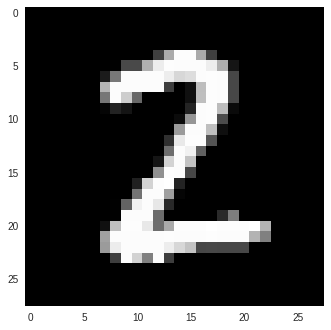

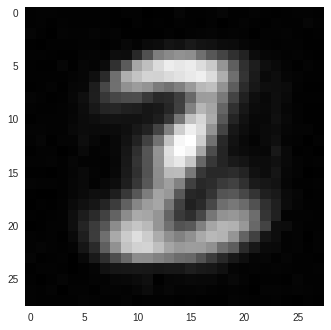

In [18]:
n = np.random.choice(range(100))
plt.figure(0)
plt.grid('off')
plt.imshow(data[n].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid('off')
plt.imshow(dx[n].reshape((28, 28)), cmap='gray')